# OML4 - Matrix Computation

Andrés F. López-Lopera <br/>
IUT - GEII, Université Polytechnique Hauts-de-France

_____

This notebook presents two exercises related to matrix operations and the resolution of systems of linear equations. It also shows an application where a matrix decomposition can be used for the image compression.

**Summary**
  1. Matrix operations
  2. Resolution of a system of linear equations
  3. Image compression using the diagonalization decomposition.

<div class="alert alert-danger">
Caution: execute the cells sequentially 
<div>

## 1. Matrix operations
Here, we will study some of the matrix operations proposed by the python toolbox ``numpy``.

In [1]:
import numpy as np # importing the toolbox numpy as "np"

We can define matrices and vector thanks to the command ``np.array``. **Attention:** python stacks numbers by rows!

In [2]:
A = np.array([[1, 1, 3], [0, -1, 2], [-2, 1, 3]]) # matrix A
b = np.array([1, 2, 3])                           # row vector b
c = np.array([[1], [2], [3]])                     # column vector c

print("A = ", A)
print("b = ", b)
print("c = ", c)

A =  [[ 1  1  3]
 [ 0 -1  2]
 [-2  1  3]]
b =  [1 2 3]
c =  [[1]
 [2]
 [3]]


We can extract elements from an ``np.array`` object using the $i,j$ indices. **Attention:** python counts from 0!!

In [3]:
print("Output 1:", A[0,2])   # the element (i=1, j=3)
print("Output 2:", A[1:,1:]) # a matrix taking the elements for the pairs (i,j) with i=2,3 and j=2,3
print("Output 3:", A[:,0:2]) # a matrix taking the elements for the pairs (i,j) with i=1,2,3 and j=1,2

Output 1: 3
Output 2: [[-1  2]
 [ 1  3]]
Output 3: [[ 1  1]
 [ 0 -1]
 [-2  1]]


``numpy`` offers a large number of utilities. We can see them by adding a period ``.`` right after the ``numpy`` object and the using the "TAB" command from the keyboard. For instance, we can check the dimension of the matrix ``A`` using the command ``A.shape``. 

In [4]:
print("Dimension of A:", A.shape) # dimension of the matrix A
print("A^T = ", A.T)              # transpose of A

Dimension of A: (3, 3)
A^T =  [[ 1  0 -2]
 [ 1 -1  1]
 [ 3  2  3]]


Some of those utilities need to be applied by using the command ``np.utility()``:

In [5]:
print(np.shape(A))     # dimension of A
print(np.transpose(A)) # transpose of A
print(np.trace(A))     # trace(A)
print(np.diag(A))      # extracting the elements from the diagonal of A
print(np.eye(3))       # defining a diagonal matrix of dimension 3

(3, 3)
[[ 1  0 -2]
 [ 1 -1  1]
 [ 3  2  3]]
3
[ 1 -1  3]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Further utilities from the linear algebra can be called using the command ``np.linalg``:

In [6]:
print("|A| = ", np.linalg.det(A))    # |A|
print("inv(A) = ", np.linalg.inv(A)) # A^(-1)

|A| =  -14.999999999999993
inv(A) =  [[ 3.33333333e-01  5.55111512e-17 -3.33333333e-01]
 [ 2.66666667e-01 -6.00000000e-01  1.33333333e-01]
 [ 1.33333333e-01  2.00000000e-01  6.66666667e-02]]


After properly defining the matrices/vectors, we can then perform the classic operations ``+, -, x``:

In [7]:
print(A + A.T) # sum of two matrices
print(A - A.T) 
print(2*A)     # multiplication 2A
print(A @ A.T) # matrix multiplication of two matrices

[[ 2  1  1]
 [ 1 -2  3]
 [ 1  3  6]]
[[ 0  1  5]
 [-1  0  1]
 [-5 -1  0]]
[[ 2  2  6]
 [ 0 -2  4]
 [-4  2  6]]
[[11  5  8]
 [ 5  5  5]
 [ 8  5 14]]


**Exercices.** Compute the trace, the transpose, the determinant and the inverse of the matrices :

$$
    A = \begin{bmatrix} 1 & 2 \\ 3 & 7 \end{bmatrix},
    \qquad
    B = \begin{bmatrix} 1 & 3 & 2 \\ 1 & 1 & -1 \\ 3 & 1 & 1 \end{bmatrix},
    \qquad
    C = \begin{bmatrix} -3 & 0 & 0 & 3 & 0 \\ -3 & 0 & -2 & 0 & 0 \\ 0 & -1 & 0 & 0 & -3 \\ 0 & 0 & 0 & 3 & 3 \\ 0 & -1 & 2 & 0 & 1 \end{bmatrix}.
$$
Verify that $A^{-1} A = I$ and $A A^{-1} = I$.

**Solution.**

In [8]:
##  write here your code
# A = np.array()
# B = np.array()
# C = np.array()

## 2. Resolution of a system of linear equations

We now focus on the resolution of systems of linear equations using ``numpy``. Consider the system of linear equations given by

\begin{equation*}
	\begin{cases}
		x_1 + 2x_2  = 1, \\
		3x_1 + 7x_2 = 2.
    \end{cases}
\end{equation*}

As we studied in the cours, this system can be written as

\begin{equation*}
    \underbrace{\begin{bmatrix}
        1 & 2 \\ 3 & 7
    \end{bmatrix}}_{\textbf{A}}
	\underbrace{\begin{bmatrix}
		x_1 \\ x_2
	\end{bmatrix}}_{\textbf{x}}
	=
	\underbrace{\begin{bmatrix}
		1 \\ 2
	\end{bmatrix}}_{\textbf{b}}.
\end{equation*}

If $A$ is invertible, then we can compute the vector $\textbf{x}$ as 

\begin{equation}
    \textbf{x} = \textbf{A}^{-1} \textbf{b}.
\end{equation}

As we observed in the first part, we can solve this problem using the toolbox ``numpy``.

In [9]:
import numpy as np 

A = np.array([[1, 2], [3, 7]]) # matrix A
b = np.array([[1], [2]]) # column vector b

print(A)
print(b)

[[1 2]
 [3 7]]
[[1]
 [2]]


In [10]:
# we first check if A is invertible by computing its determinant
detA = np.linalg.det(A)
print(detA)

0.9999999999999991


In [11]:
# Since |A| is different from 0, then A is invertible. The we can compute A^(-1)
invA = np.linalg.inv(A)
print(invA)

[[ 7. -2.]
 [-3.  1.]]


In [12]:
# now we can compute the matrix multiplication A^(-1) x b
x = invA @ b
print(x)

[[ 3.]
 [-1.]]


In [13]:
# we can make all the computations in only one line (to save memory since we avoid storing the matrix invA)
x = np.linalg.inv(A) @ b
print(x)

[[ 3.]
 [-1.]]


**Exercices.** Consider the system of linear equations given by

\begin{equation*}
	\begin{cases}
        2x_1 + 3x_2 + 4x_3  = 8, \\
		3x_1 - 5x_2 + x_3  = -7, \\
		5x_1 + 2x_2 + 2x_3  = 9.
	\end{cases}
\end{equation*}

Determine if the system has a unique solution. If so, compute the solution $\textbf{x} = [x_1, x_2, x_3]$ and verify that it is effectively a valid solution of the system.

**Solution.**

In [14]:
## write here your code
# A = np.array()
# b = np.array()

## 3. Image compression using the diagonalization method
Here, we will see how the  diagonalization method can be used to “compress” a graphical figure by representing the figure as a matrix and then using the singular value decomposition to find the closest matrix of lower rank to the original. This approach can form the basis of efficient compression methods.

In [15]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Load, manipulate and display the image:

We may guess where the picture has been taken?

![iut_geii.png](iut_geii.png)

In [16]:
image = mpimg.imread("iut_geii.png")
print(image)

[[[0.41568628 0.3764706  0.3372549  1.        ]
  [0.41568628 0.3764706  0.3372549  1.        ]
  [0.41568628 0.3764706  0.3372549  1.        ]
  ...
  [0.6117647  0.52156866 0.4        1.        ]
  [0.6039216  0.5137255  0.39215687 1.        ]
  [0.6039216  0.5137255  0.39215687 1.        ]]

 [[0.41568628 0.3764706  0.3372549  1.        ]
  [0.41568628 0.3764706  0.3372549  1.        ]
  [0.41568628 0.3764706  0.3372549  1.        ]
  ...
  [0.6117647  0.52156866 0.4        1.        ]
  [0.6039216  0.5137255  0.39215687 1.        ]
  [0.6039216  0.5137255  0.39215687 1.        ]]

 [[0.41568628 0.3764706  0.3372549  1.        ]
  [0.41568628 0.3764706  0.3372549  1.        ]
  [0.41568628 0.3764706  0.3372549  1.        ]
  ...
  [0.6039216  0.5137255  0.39215687 1.        ]
  [0.59607846 0.5058824  0.38431373 1.        ]
  [0.59607846 0.5058824  0.38431373 1.        ]]

 ...

 [[0.64705884 0.5019608  0.32941177 1.        ]
  [0.64705884 0.5019608  0.32941177 1.        ]
  [0.64313

We can extract the information relative to the matrix: dimensions, min and max values of the elements,...

In [17]:
print(image.shape) # (rows, columns, RGBA index) 

(2691, 2278, 4)


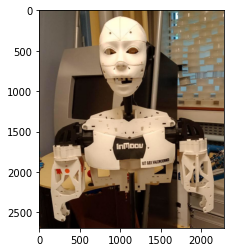

In [18]:
plt.imshow(image) 
plt.show()

<div class="alert alert-block alert-warning">

The image is a numpy array of dimension $2691 \times 2278 \times 4$  with integer values between 0 and 255.
    
In the case of an RGBA image (red channel, green channel, blue channel, opacity alpha-channel), the third dimension of the result is 4. 

For example, the first value of the sub-array of img corresponds to the red channel codes for the intensity of the red color at the first pixel of the image.

</div>

We can also transform the RGBA image into a greyscale image. To simplify this exercise, we convert the image into a greyscale with ordinary double precision values 0-255 using the following commands:

In [19]:
# to sump up red+green+blue
img_greyscale = image[:,:,0] + image[:,:,1] + image[:,:,2]
# to make this bebright white 
img_greyscale = img_greyscale*255/np.max(img_greyscale)

# print(img_greyscale)
# print(np.shape(img_greyscale))

We force the image to be a squared matrix considering the smallest number of pixels per dimension.

In [20]:
size_img = np.min(img_greyscale.shape) # detecting the smallest number of pixels per dimension.
img_greyscale = img_greyscale[:size_img, :size_img]

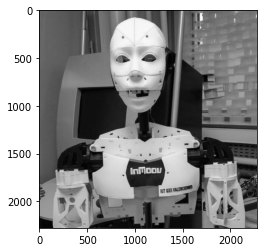

In [21]:
plt.imshow(img_greyscale, cmap = 'gray') 
plt.show()

# RMQ :
# imshow() can take as entry an image of RGB values : shape=(dim1, dim2, 3) or an image of 
# scalar value :shape=(dim1, dim2). If we pass an image of RGB values, the cmap parameter will be ignore.
# If we pass an image of scalar value and let the default value of the cmap parameter, imshow() will
# map scalar data to colors, so to have a greyscale_img we need to set cmap to 'gray'.

### Perform the diagonalization decomposition

#### Diagonalization decomposition

According to the cours, we saw that a diagonalizable matrix $A \in \mathbb{R}^{m \times m}$ can be decomposed as:

$$ A = P D P^{-1},$$

where
- $D$ is an $m \times m$ diagonal matrix composed by the $m$ eigenvalues of $A$:
$$ D = \begin{bmatrix} \lambda_1 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & 0 & \lambda_m \end{bmatrix};$$
- $P$ is an $m \times m$ matrix composed by the $m$ eigenvectors of $A$:
$$ P  = \begin{bmatrix} v_1 & \cdots & v_m \end{bmatrix}.$$

As a convention, we sort $D_{i,i}$ in a decreasing order.

The python command npl.eig allows us to perform the diagonalization decomposition of the greyscale image by using the `eig` command from the numpy linear algrebra library. See the documentation here: <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html" > https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [22]:
eigenvalues, eigenvectors = npl.eig(img_greyscale)

D = np.diag(eigenvalues)
P = eigenvectors
Pinv = npl.inv(P)

We can check the dimensions of the decomposition outputs:

In [23]:
print(D)
print(np.shape(D))

[[ 2.5118356e+05    +0.j     0.0000000e+00    +0.j
   0.0000000e+00    +0.j    ...  0.0000000e+00    +0.j
   0.0000000e+00    +0.j     0.0000000e+00    +0.j   ]
 [ 0.0000000e+00    +0.j     1.2478987e+04+28885.328j
   0.0000000e+00    +0.j    ...  0.0000000e+00    +0.j
   0.0000000e+00    +0.j     0.0000000e+00    +0.j   ]
 [ 0.0000000e+00    +0.j     0.0000000e+00    +0.j
   1.2478987e+04-28885.328j ...  0.0000000e+00    +0.j
   0.0000000e+00    +0.j     0.0000000e+00    +0.j   ]
 ...
 [ 0.0000000e+00    +0.j     0.0000000e+00    +0.j
   0.0000000e+00    +0.j    ... -6.7726687e-02    +0.j
   0.0000000e+00    +0.j     0.0000000e+00    +0.j   ]
 [ 0.0000000e+00    +0.j     0.0000000e+00    +0.j
   0.0000000e+00    +0.j    ...  0.0000000e+00    +0.j
  -4.5327479e-03    +0.j     0.0000000e+00    +0.j   ]
 [ 0.0000000e+00    +0.j     0.0000000e+00    +0.j
   0.0000000e+00    +0.j    ...  0.0000000e+00    +0.j
   0.0000000e+00    +0.j    -2.8370384e-11    +0.j   ]]
(2278, 2278)


In [24]:
print(P)
print(np.shape(P))

[[-1.8360116e-02+0.j         -5.5814944e-03+0.00686362j
  -5.5814944e-03-0.00686362j ...  4.9969200e-03+0.j
   4.1282758e-05+0.j         -5.7168619e-04+0.j        ]
 [-1.8360116e-02+0.j         -5.5814944e-03+0.00686362j
  -5.5814944e-03-0.00686362j ...  4.9969200e-03+0.j
   4.1282750e-05+0.j          5.7168619e-04+0.j        ]
 [-1.8326499e-02+0.j         -5.5577643e-03+0.00681792j
  -5.5577643e-03-0.00681792j ...  2.0396585e-02+0.j
  -1.3648403e-03+0.j          7.1947209e-12+0.j        ]
 ...
 [-1.3656827e-02+0.j          6.1835898e-03+0.00954604j
   6.1835898e-03-0.00954604j ... -9.6900836e-03+0.j
   2.2110650e-04+0.j         -1.0422786e-12+0.j        ]
 [-1.3647815e-02+0.j          6.2142918e-03+0.0093918j
   6.2142918e-03-0.0093918j  ...  4.9244565e-01+0.j
  -7.0687079e-01+0.j          7.0710653e-01+0.j        ]
 [-1.3667871e-02+0.j          6.2732222e-03+0.00932055j
   6.2732222e-03-0.00932055j ... -4.8675618e-01+0.j
   7.0682073e-01+0.j         -7.0710653e-01+0.j        ]]
(2278

We can reconstruct the original image by computing $A = P D P^{-1}$:

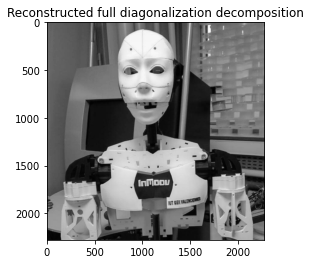

In [28]:
# Reconstructiong the image
img_greyscale_approx = P @ D @ Pinv
img_greyscale_approx = np.real(img_greyscale_approx) # to avoid complex numbers
plt.imshow(img_greyscale_approx, cmap = 'gray') 
plt.title('Reconstructed full diagonalization decomposition')
plt.show()

It is possible to quantify the error of the approximation by computing the mean squared error:

$$\mbox{MSE} = \frac{1}{n} \sum_{i = 1}^{n} (y_i - \widetilde{y}_i)^2,$$

where $y_i$ is the true value and $\widetilde{y}_i$ the approximation. This error is computed over $n$ observations.

In [ ]:
# computing the mean squared error 
print("MSE:", np.mean((img_greyscale - img_greyscale_approx)**2))

### Reconstruction of the image using some of the eigenvalues:

We seek to reconstruct different images based on matrices with lower rank. For instance, we consider the first $n = 1000$ eigenvalues.

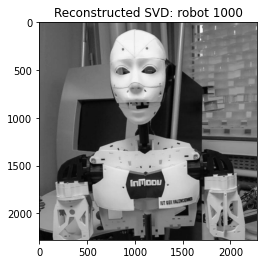

MSE: 0.33237273


In [26]:
n = 1000
img_greyscale_approx_1000 = P[:, :n] @ D[:n, :n] @ Pinv[:n, :]
img_greyscale_approx_1000 = np.real(img_greyscale_approx_1000) # to avoid complex numbers
plt.imshow(img_greyscale_approx_1000, cmap='gray')
plt.title('Reconstructed SVD: robot ' + str(n))
plt.show()

# computing the mean squared error 
print("MSE:", np.mean((img_greyscale - img_greyscale_approx_1000)**2))

**Exercice.** Compare the three reconstructed matrices considering:

- the 500 first elements ($n=500$)
- the 250 first elements ($n=250$)
- the 100 first elements ($n=100$)

Plot the associated images and comment the obtained results. Compute the mean squared error for each case and compare the results with the one using $n = 1000$.

**Solution.**

In [27]:
# write your code here